In [4]:
# === Imports ===
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
import os

from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[PREDICTION] Class: Pepper__bell___healthy (95.73%)


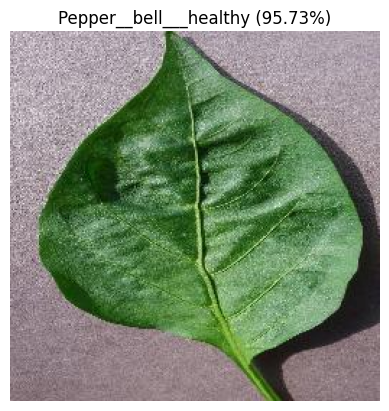

In [10]:
# === Constants ===
MODEL_PATH = "plant_disease_mobilenetv2.h5"
LABEL_BINARIZER_PATH = "label_binarizer.pkl"
IMG_SIZE = (224, 224)

# === Load the model and label binarizer ===
model = load_model(MODEL_PATH)

with open(LABEL_BINARIZER_PATH, "rb") as f:
    label_map = pickle.load(f)

class_labels = list(label_map.keys())

# === Function to load and preprocess an image ===
def load_and_prepare_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not read image: {image_path}")
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    image = img_to_array(image)
    image = preprocess_input(image)
    image = np.expand_dims(image, axis=0)
    return image

# === Predict on a test image ===
def predict_image(image_path):
    try:
        image = load_and_prepare_image(image_path)
        pred = model.predict(image)[0]
        class_idx = np.argmax(pred)
        confidence = pred[class_idx] * 100
        predicted_label = class_labels[class_idx]
        
        print(f"[PREDICTION] Class: {predicted_label} ({confidence:.2f}%)")

        # Show the image with label
        original_image = cv2.imread(image_path)
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        plt.imshow(original_image)
        plt.title(f"{predicted_label} ({confidence:.2f}%)")
        plt.axis("off")
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")

# === TEST IMAGE PATH ===
# Replace with the path of the image you want to test
test_image_path = "testing_images/pepper_bell_healthy.jpg"  # Example
predict_image(test_image_path)